<a href="https://colab.research.google.com/github/SohamK2111/Reply-Hackathon/blob/main/ControlNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install -q opencv-contrib-python
!pip install -q controlnet_aux

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.6 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import PIL
import requests
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO

In [ ]:
def download_image(url, rgb):
    response = requests.get(url)
    if rgb:
      return PIL.Image.open(BytesIO(response.content)).convert("RGB")
    else:
      return PIL.Image.open(BytesIO(response.content))

In [ ]:
image = download_image("https://cdn.shopify.com/s/files/1/0079/0613/2019/products/LPOL_AW-210021.jpg?v=1638352567", False).resize((512,512))

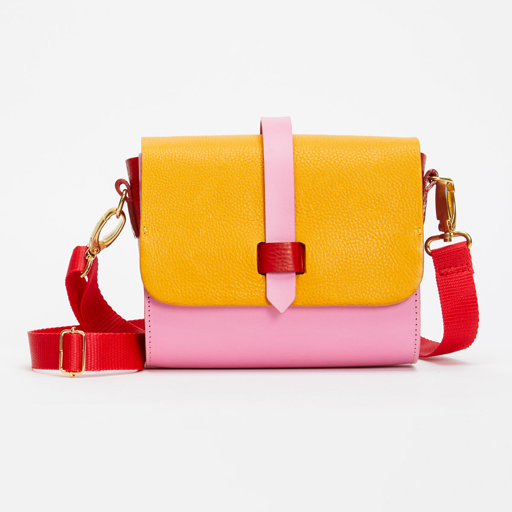

In [ ]:
image

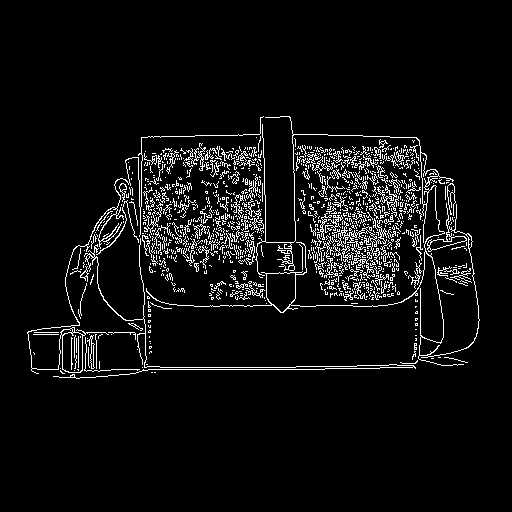

In [ ]:
import cv2
from PIL import Image

image_array = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image_array, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
# Use a faster scheduler:
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [ ]:
pipe.enable_model_cpu_offload()

In [ ]:
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
images = pipe("leather handbag with gold buckles",
             canny_image,
             num_inference_steps=20,
             num_images_per_prompt=4)[0]

  0%|          | 0/20 [00:00<?, ?it/s]

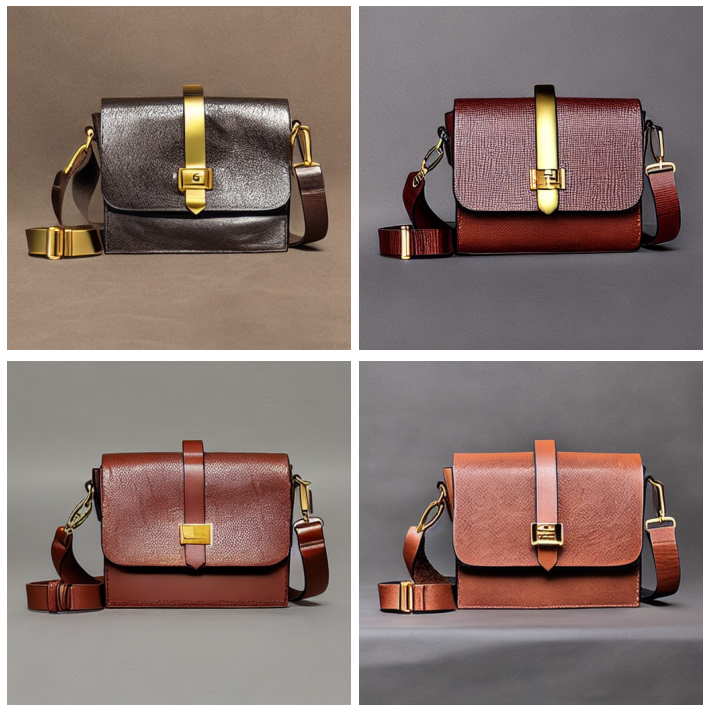

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(10, 10))

ax[0,0].imshow(images[0])
ax[0,0].axis('off')
ax[0,1].imshow(images[1])
ax[0,1].axis('off')
ax[1,0].imshow(images[2])
ax[1,0].axis('off')
ax[1,1].imshow(images[3])
ax[1,1].axis('off')

plt.tight_layout()

In [ ]:
# Using the Canny filter is only 1 option!